In [33]:
import numpy as np
import pandas as pd
import cv2 
from skimage.transform import hough_circle, hough_circle_peaks
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.draw import circle_perimeter

In [13]:
img=cv2.imread("./Dataset/circle1.png", 0)

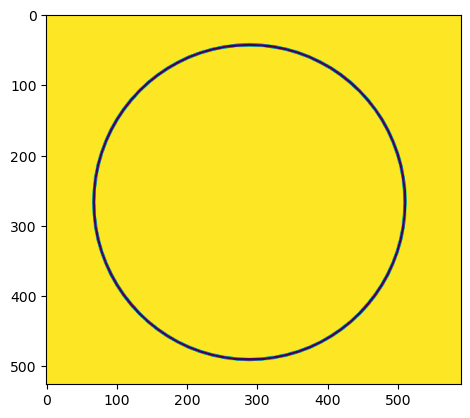

In [14]:
plt.imshow(img)
plt.show()

In [22]:
print(img.shape)
edges = cv2.Canny(img,200,891,apertureSize=3,L2gradient =True)

(526, 590)


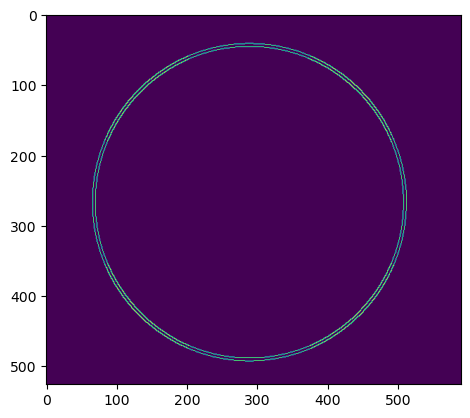

In [23]:
plt.imshow(edges)
plt.show()

In [24]:
# Guess the radius of the circle
hough_radii = np.arange(100, 400, 2)

hough_res = hough_circle(edges, hough_radii)

In [39]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

In [40]:
cx,cy,radii

(array([286]), array([267]), array([222]))

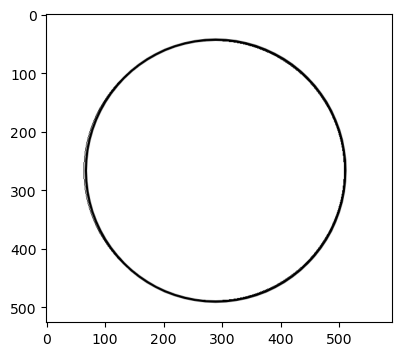

In [42]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(img)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=img.shape)
    image[circy, circx] = (0, 0, 0)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

# Perimeter

In [44]:
perimeter=2*np.pi*radii
print(perimeter)

[1394.86713819]


# Area

In [46]:
area=np.pi*(radii**2)
print(area)

[154830.25233952]
